In [1]:
from datetime import datetime, timedelta
from shapely import LineString, Point
from mobilib import Trajectory
import mobilib as mobilib
import pandas as pd
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("./test.csv")
test = test[test["id"].isin(test["id"].unique()[:3])]

In [3]:
traj = Trajectory(df=test, x="x", y="y", t="datetime", is_latlng=True, uid="id")

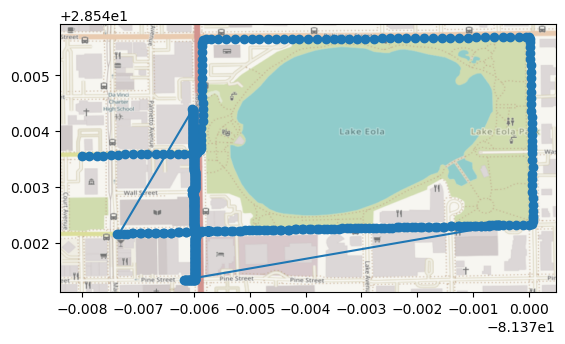

In [4]:
mobilib.image.plot(traj)

### Clustering

In [5]:
cluster = mobilib.clutering.Cluster(0.018)
traj = cluster.dbscan(traj)

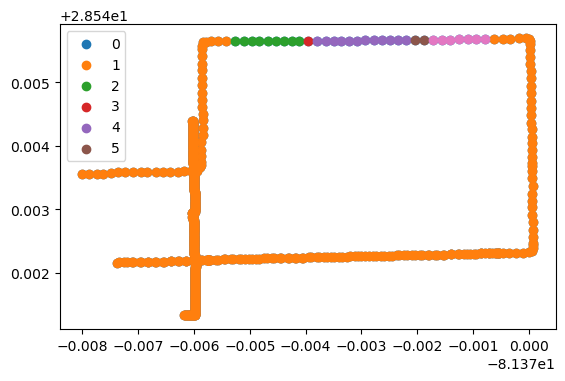

In [6]:
# plot clusters
ax = traj.gdf.plot()
for c in traj.gdf["cluster"].unique():
    cluster = traj.gdf[traj.gdf["cluster"] == c]
    ax = cluster.plot(ax=ax)
ax.legend(traj.gdf["cluster"].unique())